This notebook follows the tutorial from 
[An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html).

Let's load some test data from ```sklearn```

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

Let's investigate the data that we just loaded. A dataset contains the original data (```digits.images```), a 2 dimensional ```data``` array and some metadata about the dataset.

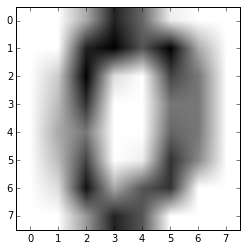

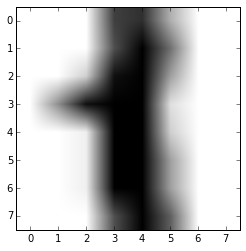

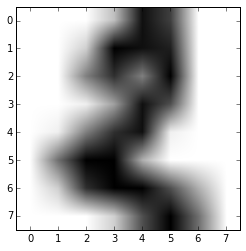

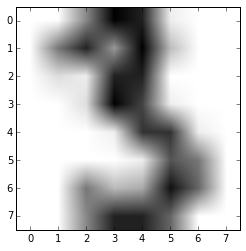

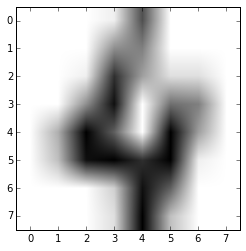

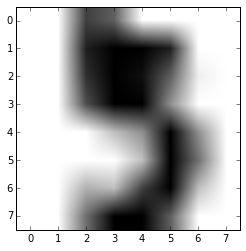

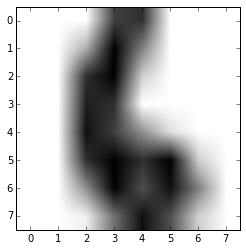

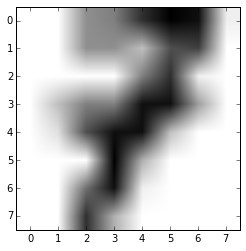

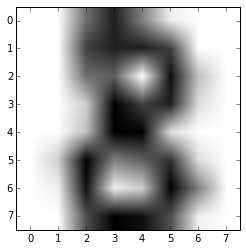

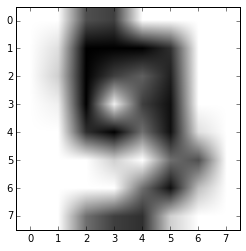

In [3]:
%matplotlib inline
from matplotlib import pyplot
# Show first 10 images
for i in xrange(10):
    pyplot.figure(i+1)
    ax = pyplot.gca() # gca = get current axis
    ax.imshow(digits.images[i],cmap=pyplot.cm.binary)

The original data is however always normalized to a single dimensional array. This leads to the ```digits.data``` array being of dimension ```len(digits.images)``` (the number of images) x ```len(digits.images[i])``` (the one-dimensional image data)

In [6]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

Our goal is now to train a machine learning algorithm with the given digits dataset, so that it can use what it has learned to later predict or **classify** new digits. In this case, we'll have 9 target classes (numbers 0-9).

For the digits training set, we already provide these target classes so that they can be used to train our classification algorithm. These classes are stored in ```digits.target``` and are also refered to as the "ground truth" for the digit dataset. 

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

For example, for ```digits.images[3]```, we have ```digits.target[3] ==  3```, as the ```digits.images[3]``` contains the number 3. 

Class for digits.images[3] = 3


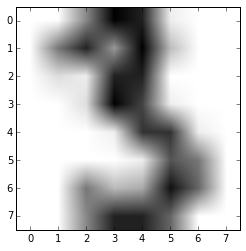

In [15]:
%matplotlib inline
print "Class for digits.images[3] =", digits.target[3]
pyplot.imshow(digits.images[3],cmap=pyplot.cm.binary)

The algorithm that we will use to do the classification is a so-called estimator. Well-known matematical estimators inlcude: absolute error, mean squared error, variance, ... In scikit-learn, an estimator for classification is a Python object that implements the methods ```fit(X, y)``` and ```predict(T)```.

An example of an estimator is the class ```sklearn.svm.SVC``` that implements support vector classification. A [Support  Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine) is non-probabilistic binary linear classifier.

The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

In [16]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)

We now train the classifier with all but the last item in the dataset (using python's ```[:-1]``` syntax) by calling the ```fit``` method.

In [17]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

Now you can predict new values, in particular, we can ask to the classifier what is the digit of our last image in the digits dataset, which we have not used to train the classifier:

In [18]:
result = clf.predict(digits.data[-1:])

Class for digits.images[-1] = 8


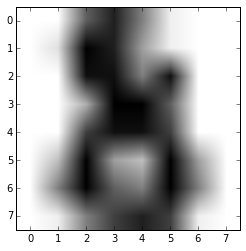

In [19]:
%matplotlib inline
print "Class for digits.images[-1] =", result[0]
pyplot.imshow(digits.images[-1],cmap=pyplot.cm.binary)